In [6]:
#匯入套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from itertools import product
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
#from sktime.performance_metrics.forecasting import mean_absolute_scaled_error

In [7]:
#忽略警告訊息
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("C:/Users/king0/OneDrive/桌面/NVDA15-23Class.csv")
data

,Date,Y,Lag_1,Lag_2,Lag_3
0,2015/1/2,1,5.012500,5.092500,5.140000
1,2015/1/5,0,5.032500,5.012500,5.092500
2,2015/1/6,0,4.947500,5.032500,5.012500
3,2015/1/7,0,4.797500,4.947500,5.032500
4,2015/1/8,1,4.785000,4.797500,4.947500
...,...,...,...,...,...
2109,2023/5/19,0,316.779999,301.779999,292.130005
2110,2023/5/22,0,312.640015,316.779999,301.779999
2111,2023/5/23,0,311.760010,312.640015,316.779999
2112,2023/5/24,0,306.880005,311.760010,312.640015


1    1150
0     964
Name: Y, dtype: int64


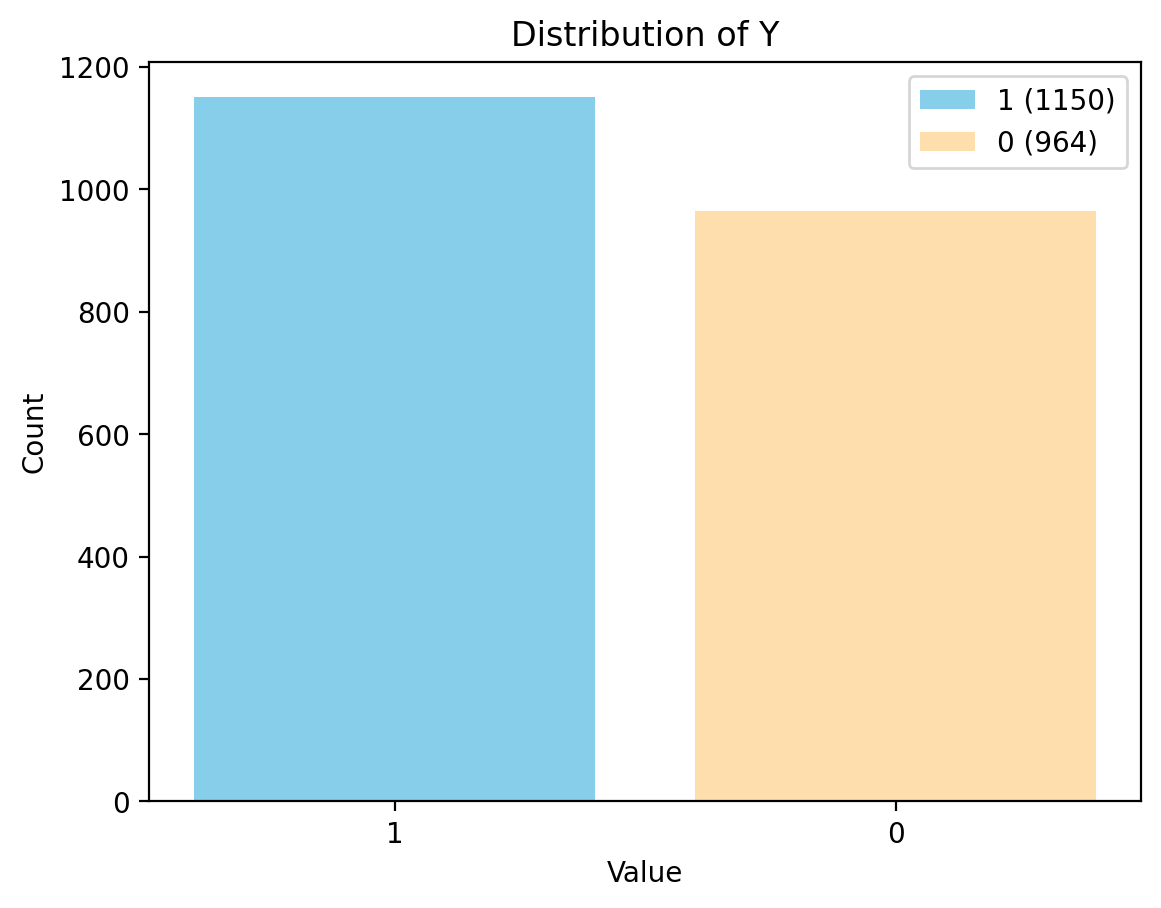

In [9]:
%config InlineBackend.figure_format='retina'

print(data['Y'].value_counts(sort=True))

value_counts = data['Y'].value_counts(sort=True)


colors = ['skyblue', 'navajowhite']  # 根據類別的數量可增加顏色
for i, (value, count) in enumerate(zip(value_counts.index, value_counts.values)):
    plt.bar(i, count, color=colors[i], label=f'{value} ({count})')
plt.xticks(range(len(value_counts)), value_counts.index)
plt.title('Distribution of Y')
plt.xlabel('Value')
plt.ylabel('Count')

plt.legend()

plt.show()


In [10]:
x=data.drop(['Date' , 'Y'],axis=1).copy()
x.head()

,Lag_1,Lag_2,Lag_3
0,5.0125,5.0925,5.1400
1,5.0325,5.0125,5.0925
2,4.9475,5.0325,5.0125
3,4.7975,4.9475,5.0325
4,4.7850,4.7975,4.9475


In [11]:
y=data['Y'].copy()
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Y, dtype: int64

# Rolling window

In [12]:
#Rolling window 切資料
x_train1 = x[0:422]
x_validation1 = x[422:844]
y_train1 = y[0:422]
y_validation1 = y[422:844]

x_train2 = x[422:844]
x_validation2 = x[844:1266]
y_train2 = y[422:844]
y_validation2 = y[844:1266]

x_train3 = x[844:1266]
x_validation3 = x[1266:1688]
y_train3 = y[844:1266]
y_validation3 = y[1266:1688]

# 第一組正規化

In [13]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train1)
new_x_train1=pd.DataFrame(data=normalize_df)
new_x_train1.columns=x.columns
print(new_x_train1.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation1)
new_x_validation1=pd.DataFrame(data=normalize_df)
new_x_validation1.columns=x.columns
print(new_x_validation1.head())

      Lag_1     Lag_2     Lag_3
0  0.020677  0.028018  0.032346
1  0.022495  0.020729  0.028018
2  0.014769  0.022551  0.020729
3  0.001136  0.014806  0.022551
4  0.000000  0.001139  0.014806
      Lag_1     Lag_2     Lag_3
0  0.015762  0.019009  0.009531
1  0.018852  0.015762  0.019009
2  0.013982  0.018852  0.015762
3  0.016339  0.013982  0.018852
4  0.000000  0.016339  0.013982


# 第二組正規化

In [14]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train2)
new_x_train2=pd.DataFrame(data=normalize_df)
new_x_train2.columns=x.columns
print(new_x_train2.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation2)
new_x_validation2=pd.DataFrame(data=normalize_df)
new_x_validation2.columns=x.columns
print(new_x_validation2.head())

      Lag_1     Lag_2     Lag_3
0  0.015762  0.019009  0.009531
1  0.018852  0.015762  0.019009
2  0.013982  0.018852  0.015762
3  0.016339  0.013982  0.018852
4  0.000000  0.016339  0.013982
      Lag_1     Lag_2     Lag_3
0  0.793074  0.759921  0.749322
1  0.819879  0.793074  0.759921
2  0.785371  0.819879  0.793074
3  0.790486  0.785371  0.819879
4  0.730096  0.790486  0.785371


# 第三組正規化

In [15]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train3)
new_x_train3=pd.DataFrame(data=normalize_df)
new_x_train3.columns=x.columns
print(new_x_train3.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation3)
new_x_validation3=pd.DataFrame(data=normalize_df)
new_x_validation3.columns=x.columns
print(new_x_validation3.head())

      Lag_1     Lag_2     Lag_3
0  0.793074  0.759921  0.749322
1  0.819879  0.793074  0.759921
2  0.785371  0.819879  0.793074
3  0.790486  0.785371  0.819879
4  0.730096  0.790486  0.785371
      Lag_1     Lag_2     Lag_3
0  0.077483  0.066804  0.064992
1  0.070931  0.077483  0.066804
2  0.068547  0.070931  0.077483
3  0.073231  0.068547  0.070931
4  0.073719  0.073231  0.068547


In [17]:
#第一組驗證
knncl = KNeighborsClassifier()
parameters = {'n_neighbors' : range(1,401),
              'metric' : ['euclidean' , 'minkowski' , 'Hamming']
             }
x_set = np.concatenate([new_x_train1, new_x_validation1])
y_set = np.concatenate([y_train1, y_validation1])
model = GridSearchCV(knncl, parameters, scoring='accuracy', cv=3, refit=True)
model_result = model.fit(x_set,y_set)
print(model_result.best_params_,' score ：',model_result.best_score_)

{'metric': 'euclidean', 'n_neighbors': 57}  score ： 0.5663789404608667


In [18]:
#第二駔驗證
knncl = KNeighborsClassifier()
parameters = {'n_neighbors' : range(1,401),
              'metric' : ['euclidean' , 'minkowski' , 'Hamming']
             }
x_set = np.concatenate([new_x_train2, new_x_validation2])
y_set = np.concatenate([y_train2, y_validation2])
model = GridSearchCV(knncl, parameters, scoring='accuracy', cv=3, refit=True)
model_result = model.fit(x_set,y_set)
print(model_result.best_params_,' score ：',model_result.best_score_)

{'metric': 'euclidean', 'n_neighbors': 119}  score ： 0.5521146193516906


In [19]:
#第三組驗證
knncl = KNeighborsClassifier()
parameters = {'n_neighbors' : range(1,401),
              'metric' : ['euclidean' , 'minkowski' , 'Hamming']
             }
x_set = np.concatenate([new_x_train3, new_x_validation3])
y_set = np.concatenate([y_train3, y_validation3])
model = GridSearchCV(knncl, parameters, scoring='accuracy', cv=3, refit=True)
model_result = model.fit(x_set,y_set)
print(model_result.best_params_,' score ：',model_result.best_score_)

{'metric': 'euclidean', 'n_neighbors': 228}  score ： 0.5462086603905337


In [20]:
x_train = x[:1688]
x_test = x[1688:]
y_train = y[:1688]
y_test = y[1688:]

In [21]:
model = KNeighborsClassifier(metric = 'euclidean' , n_neighbors = 57)
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=57)

In [22]:
result = model.predict(x_test)
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Testing ACC: 0.495
Testing f1s: 0.65
Testing pre: 0.51
Testing sen: 0.93
Testing spe: 0.03
AUC: 0.47


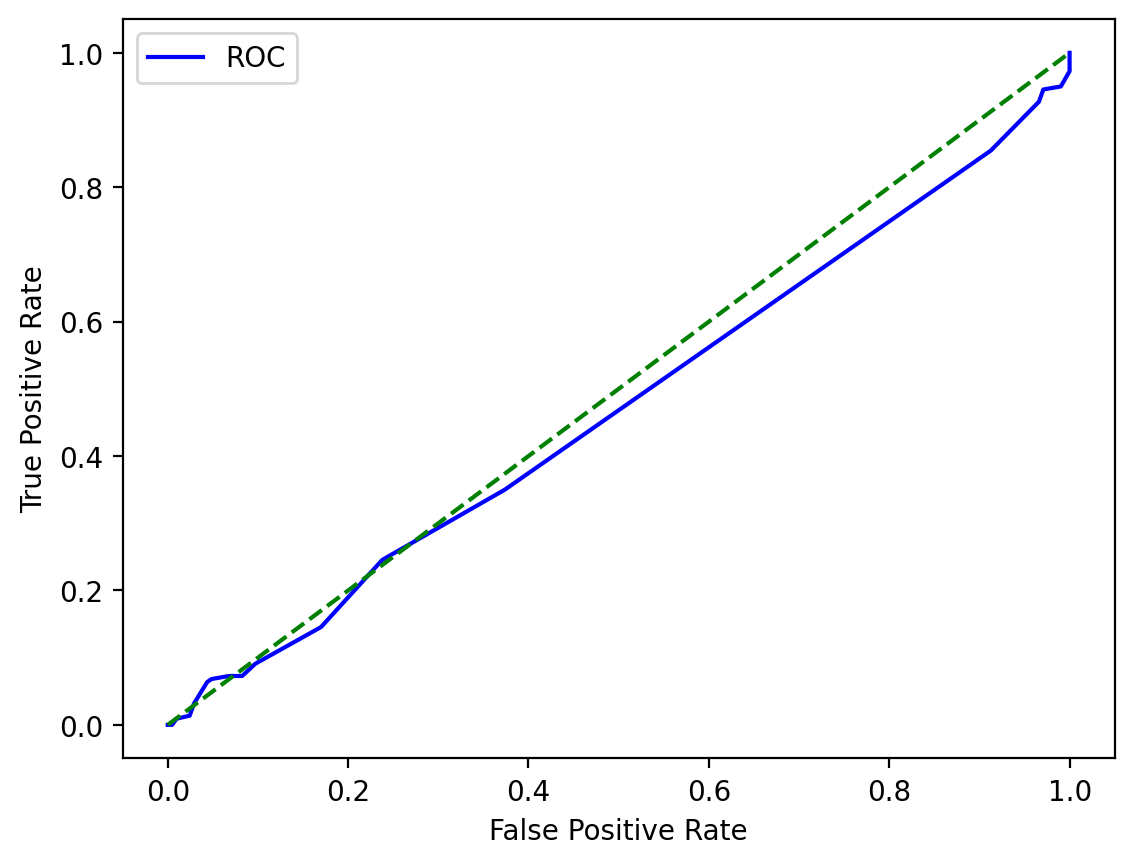

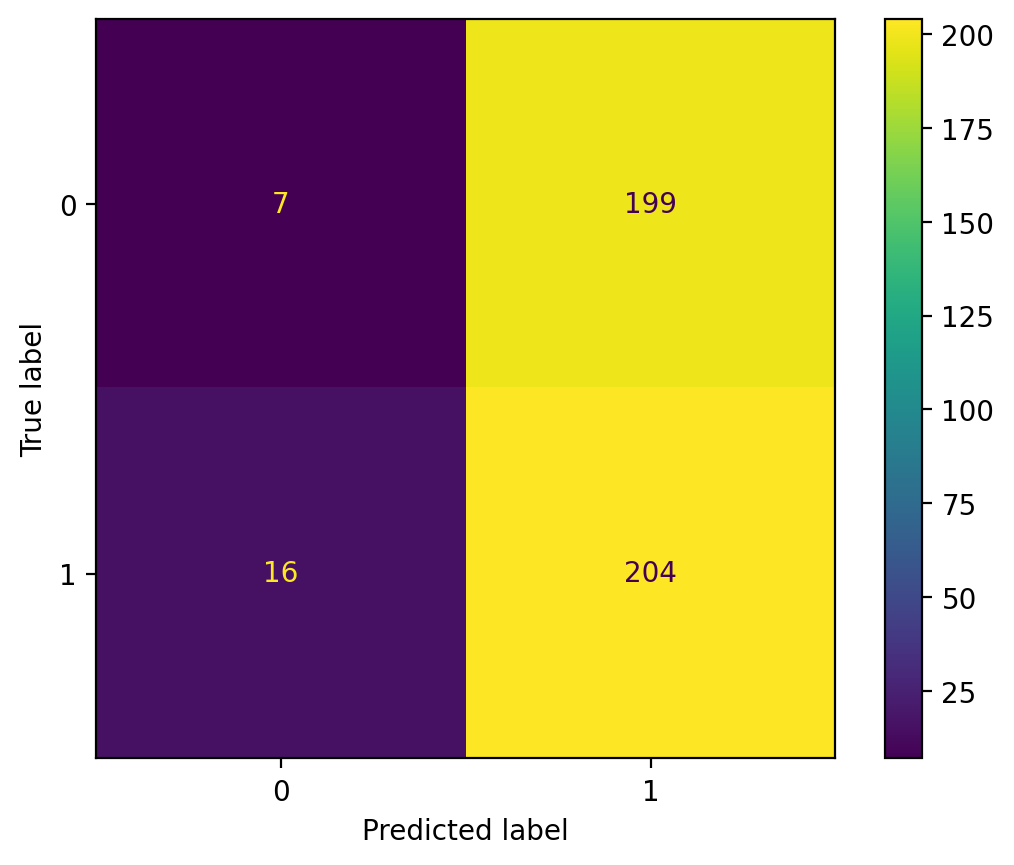

In [26]:
### Evaluate with testing data set
final_model_testing_prediction=model.predict(x_test)
final_model_testing_acc=accuracy_score(y_test,final_model_testing_prediction)
final_model_testing_f1s=f1_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre=precision_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen=recall_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe=recall_score(y_test,final_model_testing_prediction,pos_label=0)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
prob = model.predict_proba(x_test)
prob = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, prob)

auc_value = roc_auc_score(y_test, prob)

#print result
print('Testing ACC:',round(final_model_testing_acc,3))
print('Testing f1s:',round(final_model_testing_f1s,2))
print('Testing pre:',round(final_model_testing_pre,2))
print('Testing sen:',round(final_model_testing_sen,2))
print('Testing spe:',round(final_model_testing_spe,2))
print('AUC:',round(auc_value,2))
plot_roc_curve(fpr, tpr)
testing_cm=confusion_matrix(y[1688:],result)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(testing_cm,display_labels=["0","1"]).plot()
#confusion_matrix(model,x_test,y_test,display_labels=["0 will go down","1 will go up"])